/home/alex/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


4.5015574559320215e-09


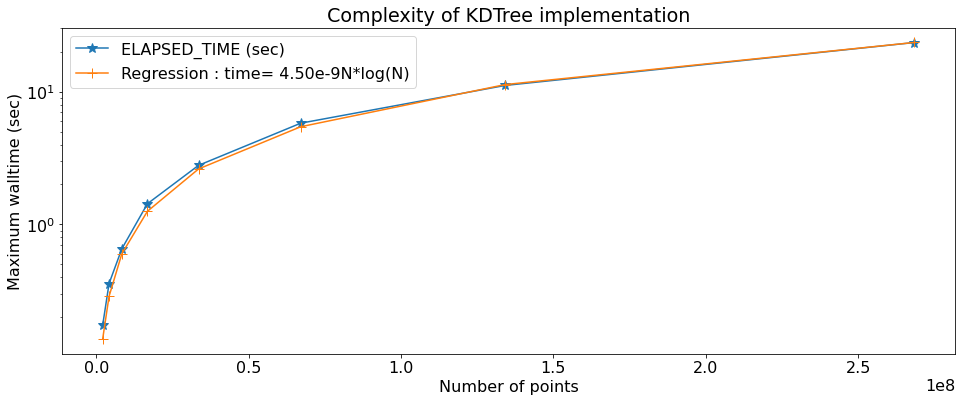

In [43]:
##complexity
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
x = []
y = []
z = []

plt.rc('font', size=16) 
plt.figure(figsize=(16,6))

with open('time_complex','r') as File:  
    Lines = csv.reader(File, delimiter = ' ')
    for row in Lines:
        y.append(float(row[0]))

for i in range(0,8):
    x.append(2097152*2**i)
    
def func(x_i, k,b):
    return k*x_i*np.log(x_i)

popt, pcov = curve_fit(func, x, y)

for data in x:
    z.append(popt[0]*data*np.log(data))
print(popt[0])
plt.plot(x, y, '*-', label = "ELAPSED_TIME (sec)", markersize=10)
plt.plot(x, z, '+-', label = "Regression : time= 4.50e-9N*log(N)", markersize=10)
plt.xlabel('Number of points')
plt.ylabel('Maximum walltime (sec)')

plt.title('Complexity of KDTree implementation')
plt.semilogy()
plt.legend()
#plt.show()
plt.savefig('KDTREE_COMP.jpg', bbox_inches='tight')

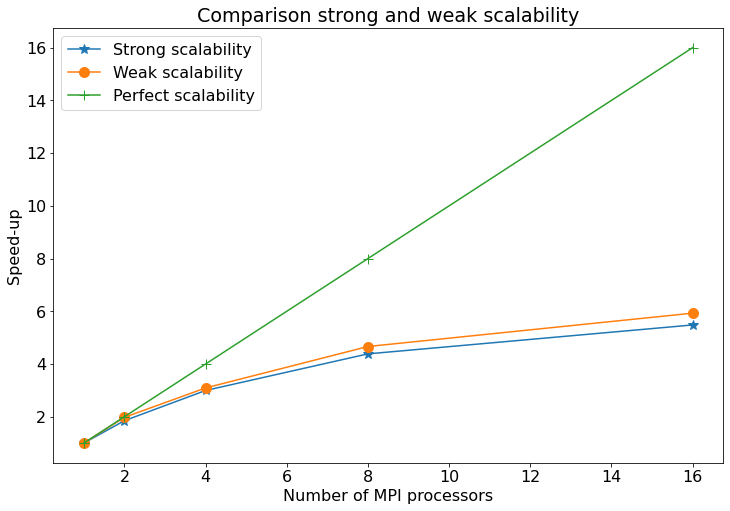

In [61]:
#scalability
x = []
y_aux = []
y = []
z = []
y_weak = []
y_aux2=[]
plt.rc('font', size=16) 
plt.figure(figsize=(12,8))

with open('strong_scal','r') as File:  
    Lines = csv.reader(File, delimiter = ' ')
    for row in Lines:
        y_aux.append(float(row[0]))
        
with open('weak_scal','r') as File:  
    Lines = csv.reader(File, delimiter = ' ')
    for row in Lines:
        y_aux2.append(float(row[0]))
        
for j in range(0,5):
    y.append((y_aux[0]/y_aux[j]))
    
for j in range(0,5):
    y_weak.append(2**j*(y_aux2[0]/y_aux2[j]))
    
for i in range(0,5):
    x.append(2**i)
    
plt.plot(x, y, '*-', label = "Strong scalability", markersize=10)
plt.plot(x, y_weak, 'o-', label = "Weak scalability", markersize=10)
plt.plot(x, x, '+-', label = "Perfect scalability", markersize=10)
plt.xlabel('Number of MPI processors')
plt.ylabel('Speed-up')

plt.title('Comparison strong and weak scalability')
plt.legend()
#plt.show()
plt.savefig('KDTREE_SCAL.jpg', bbox_inches='tight')